In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet
%matplotlib inline

In [2]:
df = pd.read_csv('weather_day.csv')
df = df[['dteday', 'cnt', 'temp', 'weathersit']].dropna()

df['dteday'] = pd.to_datetime(df['dteday'])
df = df.set_index('dteday')

daily_df = df.resample('D').mean()
d_df = daily_df.reset_index().dropna()

d_df['date_index'] = d_df['dteday']
d_df['date_index'] = pd.to_datetime(d_df['date_index'])
d_df = d_df.set_index('date_index')

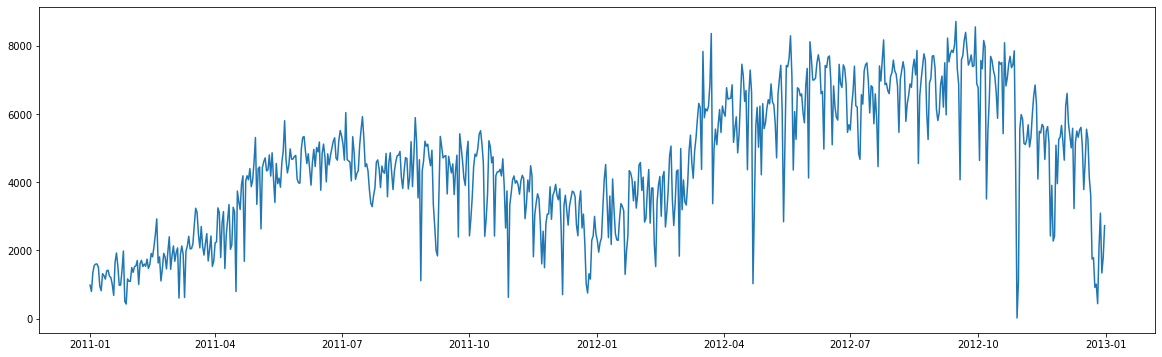

In [4]:
d_df.columns = ['ds', 'y', 'temp', 'weathersit']

fig = plt.figure(facecolor='w', figsize=(20, 6))
plt.plot(d_df.ds, d_df.y)

In [7]:
t = 13
min_t = -8
max_t = 39
n_t = (t - min_t)/(max_t - min_t)
print(n_t)

future_range = pd.date_range('2013-01-01', periods=10, freq='D')
future_temp_df = pd.DataFrame({ 'future_date': future_range, 'future_temp' : 0, 'future_weathersit': 0})

future_temp_df['future_date'] = pd.to_datetime(future_temp_df['future_date'])
future_temp_df = future_temp_df.set_index('future_date')

future_temp_df.at['2013-01-01', 'future_temp'] = 0.319148
future_temp_df.at['2013-01-02', 'future_temp'] = 0.255319
future_temp_df.at['2013-01-03', 'future_temp'] = 0.234042
future_temp_df.at['2013-01-04', 'future_temp'] = 0.319148
future_temp_df.at['2013-01-05', 'future_temp'] = 0.340425
future_temp_df.at['2013-01-06', 'future_temp'] = 0.404255
future_temp_df.at['2013-01-07', 'future_temp'] = 0.361702
future_temp_df.at['2013-01-08', 'future_temp'] = 0.404255
future_temp_df.at['2013-01-09', 'future_temp'] = 0.425531
future_temp_df.at['2013-01-10', 'future_temp'] = 0.446808

future_temp_df.at['2013-01-01', 'future_weathersit'] = 4
future_temp_df.at['2013-01-02', 'future_weathersit'] = 4
future_temp_df.at['2013-01-03', 'future_weathersit'] = 4
future_temp_df.at['2013-01-04', 'future_weathersit'] = 4
future_temp_df.at['2013-01-05', 'future_weathersit'] = 4
future_temp_df.at['2013-01-06', 'future_weathersit'] = 4
future_temp_df.at['2013-01-07', 'future_weathersit'] = 4
future_temp_df.at['2013-01-08', 'future_weathersit'] = 4
future_temp_df.at['2013-01-09', 'future_weathersit'] = 4
future_temp_df.at['2013-01-10', 'future_weathersit'] = 4

future_temp_df.tail(10)

0.44680851063829785


,future_temp,future_weathersit
future_date,,
2013-01-01,0.319148,4
2013-01-02,0.255319,4
2013-01-03,0.234042,4
2013-01-04,0.319148,4
2013-01-05,0.340425,4
2013-01-06,0.404255,4
2013-01-07,0.361702,4
2013-01-08,0.404255,4
2013-01-09,0.425531,4


In [11]:
def weather_temp(ds):
    date = (pd.to_datetime(ds)).date()
    
    if d_df[date:].empty:
        return future_temp_df[date:]['future_temp'].values[0]
    else:
        return (d_df[date:]['temp']).values[0]
    
    return 0

def weather_condition(ds):
    date = (pd.to_datetime(ds)).date()
    
    if d_df[date:].empty:
        return future_temp_df[date:]['future_weathersit'].values[0]
    else:
        return (d_df[date:]['weathersit']).values[0]
    
    return 0

m = Prophet()
m.add_regressor('temp')
m.add_regressor('weathersit')
m.fit(d_df)

future = m.make_future_dataframe(periods=10)
future['temp'] = future['ds'].apply(weather_temp)
future['weathersit'] = future['ds'].apply(weather_condition)

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
726,2012-12-27,3204.340114,2241.783045,4221.914946
727,2012-12-28,3278.126028,2267.475763,4320.358421
728,2012-12-29,3255.886084,2250.509245,4305.594831
729,2012-12-30,3770.146764,2693.654578,4792.355064
730,2012-12-31,2922.695421,1891.815904,3968.177251
731,2013-01-01,1829.056525,829.212831,2895.233366
732,2013-01-02,1687.013220,582.675755,2712.310191
733,2013-01-03,1745.120413,686.522824,2827.492963
734,2013-01-04,2254.197919,1204.042928,3233.011973
735,2013-01-05,2394.424691,1310.869412,3464.312541


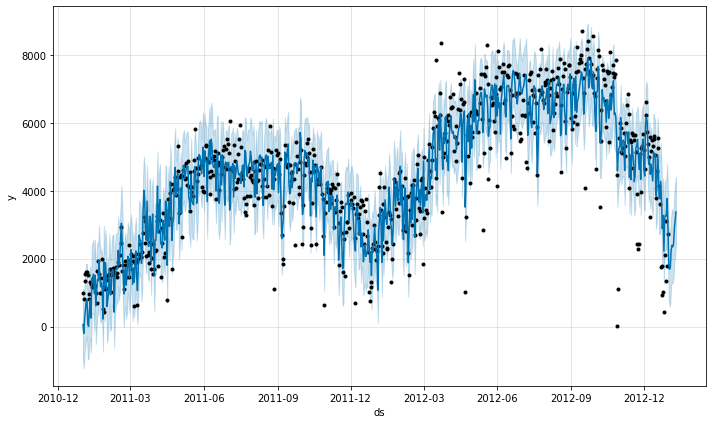

In [12]:
fig1 = m.plot(forecast)

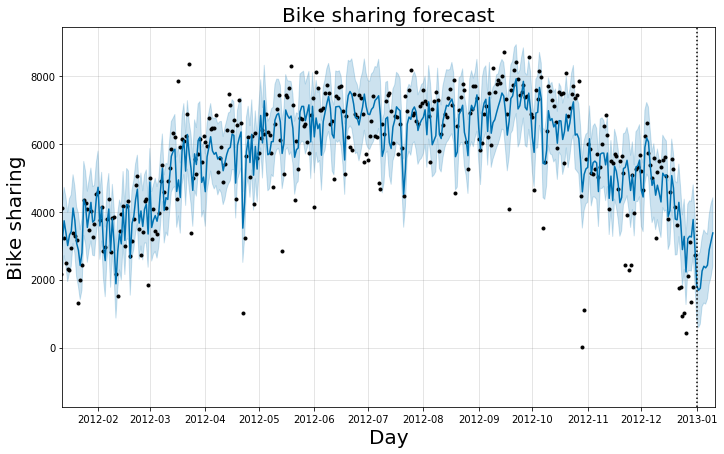

In [13]:
from datetime import datetime, timedelta

fig1 = m.plot(forecast)

#datenow = datetime.now()
datenow = datetime(2013, 1, 1)
dateend = datenow + timedelta(days=10)
datestart = dateend - timedelta(days=365)

plt.xlim([datestart, dateend])
plt.title("Bike sharing forecast", fontsize=20)
plt.xlabel("Day", fontsize=20)
plt.ylabel("Bike sharing", fontsize=20)
plt.axvline(datenow, color="k", linestyle=":")
plt.show()

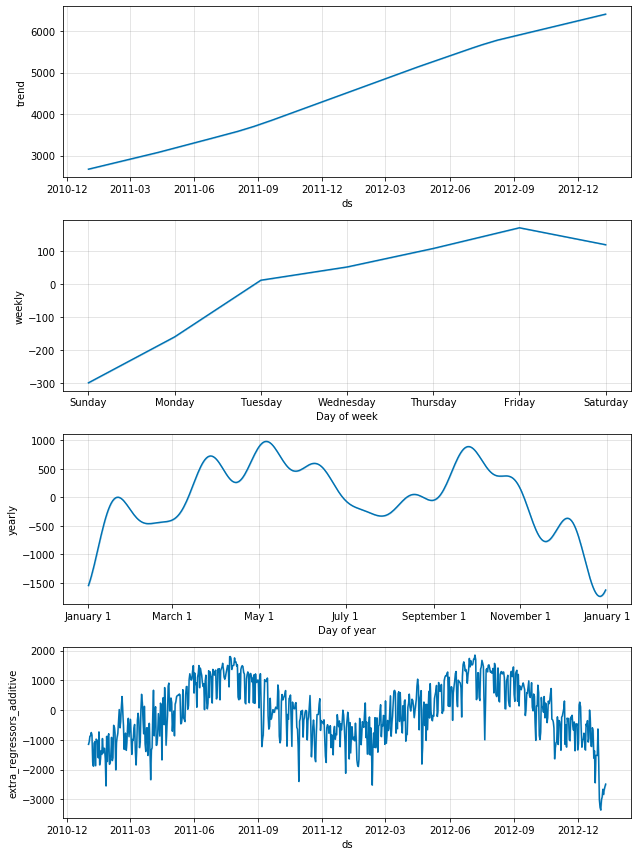

In [14]:
fig2 = m.plot_components(forecast)

In [15]:
from fbprophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(m, horizon='30 days')
df_p = performance_metrics(df_cv)
df_p.head(5)

INFO:fbprophet:Making 23 forecasts with cutoffs between 2012-01-06 00:00:00 and 2012-12-01 00:00:00


,horizon,mse,rmse,mae,mape,coverage
0,3 days,1.342414e+06,1158.625968,882.003845,0.208843,0.565217
1,4 days,1.192002e+06,1091.788598,818.890907,0.195731,0.637681
2,5 days,9.199894e+05,959.160765,749.122497,0.147538,0.652174
3,6 days,8.476828e+05,920.696894,671.425468,0.138440,0.724638
4,7 days,8.445181e+05,918.976639,665.531889,0.146211,0.710145


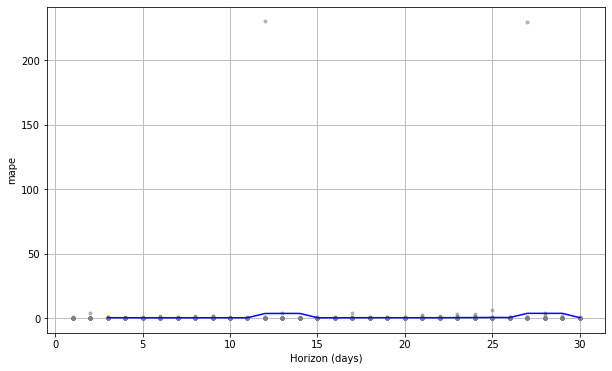

In [16]:
from fbprophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(df_cv, metric='mape')